In [37]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)
dataset = pd.read_csv('contest_train.csv', sep=',')
dataset = dataset.dropna(axis=1, how='any')
print(dataset.shape)
dataset.head()


(18390, 209)


,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55,FEATURE_56,FEATURE_57,FEATURE_58,FEATURE_59,FEATURE_60,FEATURE_61,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,FEATURE_74,FEATURE_75,FEATURE_76,FEATURE_77,FEATURE_78,FEATURE_79,FEATURE_80,FEATURE_81,FEATURE_82,FEATURE_83,FEATURE_84,FEATURE_85,FEATURE_86,FEATURE_87,FEATURE_88,FEATURE_89,FEATURE_90,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100,FEATURE_101,FEATURE_102,FEATURE_103,FEATURE_104,FEATURE_105,FEATURE_106,FEATURE_107,FEATURE_108,FEATURE_109,FEATURE_110,FEATURE_111,FEATURE_112,FEATURE_113,FEATURE_114,FEATURE_115,FEATURE_116,FEATURE_117,FEATURE_118,FEATURE_119,FEATURE_120,FEATURE_121,FEATURE_122,FEATURE_139,FEATURE_140,FEATURE_141,FEATURE_142,FEATURE_143,FEATURE_144,FEATURE_145,FEATURE_146,FEATURE_147,FEATURE_148,FEATURE_154,FEATURE_155,FEATURE_156,FEATURE_157,FEATURE_158,FEATURE_159,FEATURE_160,FEATURE_161,FEATURE_163,FEATURE_164,FEATURE_165,FEATURE_166,FEATURE_167,FEATURE_168,FEATURE_169,FEATURE_170,FEATURE_171,FEATURE_172,FEATURE_176,FEATURE_177,FEATURE_178,FEATURE_179,FEATURE_180,FEATURE_182,FEATURE_184,FEATURE_185,FEATURE_186,FEATURE_197,FEATURE_198,FEATURE_199,FEATURE_200,FEATURE_201,FEATURE_202,FEATURE_214,FEATURE_215,FEATURE_216,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259,TARGET
0,737005990,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-13.093355,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.540889,0.0,6.010374,-1.345941,0.0,-2.317090,0.0,0.0,0.0,0.0,0.0,0.0,45.595312,31.056361,61.251668,27.044580,-30.549305,64.179404,0.0,0.0,0.0,0.0,0.0,0.0,-13.846640,-4.867411,138.356993,41.342282,26.000672,3.534147,16.113696,2.646936,115.196945,-0.230957,-42.706975,4.477980,537.881691,675.539041,186.113505,187.792824,291.055165,306.434206,1072.353535,900.798023,280.067714,519.071248,554.802871,457.021870,31.0,0.0,0.0,0.0,0.000000,-1.005515,122.368806,-157.445756,38.731676,92.256853,67.834208,112.332415,430.193935,0.134554,-0.095671,0.232083,0.376482,-0.592367,-4.021263,-45.776392,52.110346,-56.175413,8.084219,-0.222007,-0.323932,20.178933,28.974286,0.572080,0.208950,3.178799,86.036299,95.512168,3.277402,0.524227,0.060851,9.150832,39.200769,1.434851,0.333333,0.333333,6.862864,33.128887,1.333333,19.0,21.0,14.0,17.0,21.0,22.0,19.0,21.0,0.0,0.0,0.0,28.0,-1.238852,0.0,0.0,0.0,-70.429076,0.00,3.0,0.0,0.0,0.0,3.0,0.0,118.048070,131.241969,107.253544,256.398495,1.0,5.0,3.0,12.009587,3.000000,30.333333,0.0,0.0,0.0,25.734055,0.0,0.0,31.0,2899.677083,1.0,13.0,2942.221701,0.0,0.0,3.0,0.0,1.0,0.0,0.0,177.0,250.0,-14.402173,1.0,1.0,1.0,44.0,30.0,-18.145340,0.0,107.172630,0.0,12.0,60.329488,0.0,-7.645600,0.0,-14.982662,-19.907022,0.0,235.351475,253.090095,522.408476,0.0,2.0,111.195748,0.0,0.0,0.0,68.404615,0.0,0.0,0.0,1.0,0.0,1.0,0.0,65.729608,68.566610,0.0,0.0,0.0,1.0,1.0,1.0,0
1,336625142,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.920928,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851897,0.0,-6.911539,4.005305,0

In [40]:
dataset.describe()

,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55,FEATURE_56,FEATURE_57,FEATURE_58,FEATURE_59,FEATURE_60,FEATURE_61,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,FEATURE_74,FEATURE_75,FEATURE_76,FEATURE_77,FEATURE_78,FEATURE_79,FEATURE_80,FEATURE_81,FEATURE_82,FEATURE_83,FEATURE_84,FEATURE_85,FEATURE_86,FEATURE_87,FEATURE_88,FEATURE_89,FEATURE_90,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100,FEATURE_101,FEATURE_102,FEATURE_103,FEATURE_104,FEATURE_105,FEATURE_106,FEATURE_107,FEATURE_108,FEATURE_109,FEATURE_110,FEATURE_111,FEATURE_112,FEATURE_113,FEATURE_114,FEATURE_115,FEATURE_116,FEATURE_117,FEATURE_118,FEATURE_119,FEATURE_120,FEATURE_121,FEATURE_122,FEATURE_139,FEATURE_140,FEATURE_141,FEATURE_142,FEATURE_143,FEATURE_144,FEATURE_145,FEATURE_146,FEATURE_147,FEATURE_148,FEATURE_154,FEATURE_155,FEATURE_156,FEATURE_157,FEATURE_158,FEATURE_159,FEATURE_160,FEATURE_161,FEATURE_163,FEATURE_164,FEATURE_165,FEATURE_166,FEATURE_167,FEATURE_168,FEATURE_169,FEATURE_170,FEATURE_171,FEATURE_172,FEATURE_176,FEATURE_177,FEATURE_178,FEATURE_179,FEATURE_180,FEATURE_182,FEATURE_184,FEATURE_185,FEATURE_186,FEATURE_197,FEATURE_198,FEATURE_199,FEATURE_200,FEATURE_201,FEATURE_202,FEATURE_214,FEATURE_215,FEATURE_216,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259,TARGET
count,1.839000e+04,18390.000000,18390.000000,18390.000000,18390.0,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.00000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.0000

In [54]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
acc_dict = {}

In [56]:
y_train

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

c:\my\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Local\Temp\ipykernel_19848\1890559766.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\PC\AppData\Local\Temp\ipykernel_19848\1890559766.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\PC\AppData\Local\Temp\ipykernel_

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

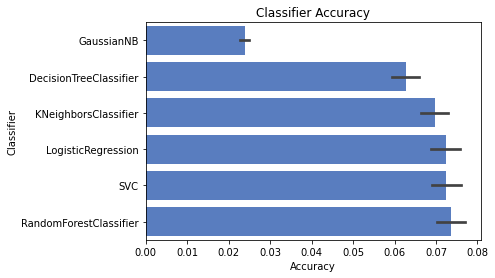

In [58]:

for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

In [23]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(x[:5,:])
print(y[:10])

[[ 2.  2.  0. ...  1.  1.  1.]
 [ 2.  1.  0. ...  1.  1.  1.]
 [12.  5.  0. ...  2.  1.  1.]
 [59.  5.  0. ...  1.  1.  2.]
 [ 1.  1.  0. ...  1.  2.  1.]]
[0 0 2 0 1 2 0 0 0 0]


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [33]:
y_pred = classifier.predict(x_test)
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))


Predicted     0    1   2
Actual                  
0          3132  109  26
1           937   68  25
2           223   28  50


In [32]:
# По парно смотрим корреляции 
colormap = plt.cm.viridis
plt.figure(figsize=(209,209))
plt.title('Попарная корреляция', y=1.05, size=20)
sns.heatmap(df.corr(), square=True, annot=True, cmap=colormap)
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)